In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [0]:
cd /content/drive/My Drive/Colab Notebooks/dw_matrix

/content/drive/My Drive/Colab Notebooks/dw_matrix


In [0]:
ls data

men_shoes.csv


In [0]:
df = pd.read_csv('data/men_shoes.csv', low_memory=False)

In [0]:
df.shape

(18280, 48)

In [0]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [0]:
mean_price = np.mean(df['prices_amountmin'])
mean_price

93.53952188183217

In [0]:
y_true = df['prices_amountmin']
y_pred = [mean_price] * y_true.shape[0]

In [0]:
mean_absolute_error(y_true, y_pred)

63.968341227870624

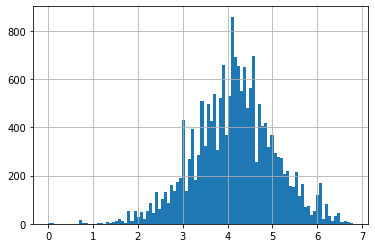

In [0]:
np.log1p(df['prices_amountmin']).hist(bins=100)

In [0]:
y_true = df['prices_amountmin']
y_pred = [np.median(y_true)] * y_true.shape[0]
mean_absolute_error(y_true, y_pred)

58.01120240700219

In [0]:
np.median(y_true)

64.95

In [0]:
y_true = df['prices_amountmin']
price_log_mean = np.expm1(np.mean(np.log1p(y_true)))
y_pred = [price_log_mean] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

58.03539547661041

In [0]:
df.brand.value_counts()

Nike                       1709
PUMA                        574
Ralph Lauren                524
New Balance                 361
VANS                        356
                           ... 
Roc usa                       1
Calcutta                      1
MG:DAKOTA                     1
batman                        1
Timberland Boot Company       1
Name: brand, Length: 1856, dtype: int64

In [0]:
df['brand'].factorize()[0]

array([  0,   0,   1, ..., 411, 411, 411])

In [0]:
df['brand_cat']=df['brand'].factorize()[0]

In [0]:
feats = ['brand_cat']
X = df[feats].values
y = df['prices_amountmin'].values

model = DecisionTreeRegressor(max_depth=5)

scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
np.mean(scores), np.std(scores)

(-58.38655694633361, 4.223555478221712)

In [0]:
def run_model(feats):
  X = df[feats].values
  y = df['prices_amountmin'].values

  model = DecisionTreeRegressor(max_depth=5)

  scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
  return np.mean(scores), np.std(scores)

In [0]:
run_model(['brand_cat'])

(-58.38655694633361, 4.223555478221712)

In [0]:
df['manufacturer_cat']=df['manufacturer'].factorize()[0]

In [0]:
df['manufacturer_cat']

0         -1
1         -1
2         -1
3         -1
4         -1
        ... 
18275     -1
18276    257
18277     -1
18278     -1
18279     -1
Name: manufacturer_cat, Length: 18280, dtype: int64

In [0]:
run_model(['manufacturer_cat'])

(-63.133649278023746, 3.394307434888982)

In [0]:
run_model(['brand_cat', 'manufacturer_cat'])

(-58.53930419908596, 4.31122323161543)

In [0]:
!git config --global user.email "bargatroll@gmail.com"
!git config --global user.name "betanot"

In [36]:
!git add dw_matrix/day4.ipynb

fatal: pathspec 'dw_matrix/day4.ipynb' did not match any files


In [0]:
pwd
